## Notes 

Some ideas taken from [here](http://people.virginia.edu/~lz2n/mse6020/notes/D-partial-fcc.pdf) and from [here](http://www.slideshare.net/omaratefradwan/mse501-ch5-radwan).

Burgers vector of the lowest energy dislocation is 
$$
    b = \frac{a}{2} \langle 110 \rangle \qquad \Rightarrow\qquad  |b| = \frac{a}{\sqrt{2}}
$$
The next best option is 
$$
    b' = a \langle 001 \rangle \qquad \Rightarrow \qquad |b'| = a 
$$
(the latter is rarely observed!) 

The slip-plane for $b'$ dislocations are $\{111\}$ close packed planes stacked in ABCABC arrangement. 

But of course we can equivalently take $b \propto 101$ or $b \propto 011$. 



In [1]:
using PyPlot
using JuLIP
using JuLIP.ASE, JuLIP.Potentials, JuLIP.Constraints 


In [7]:
reload("MaterialsScienceTools")

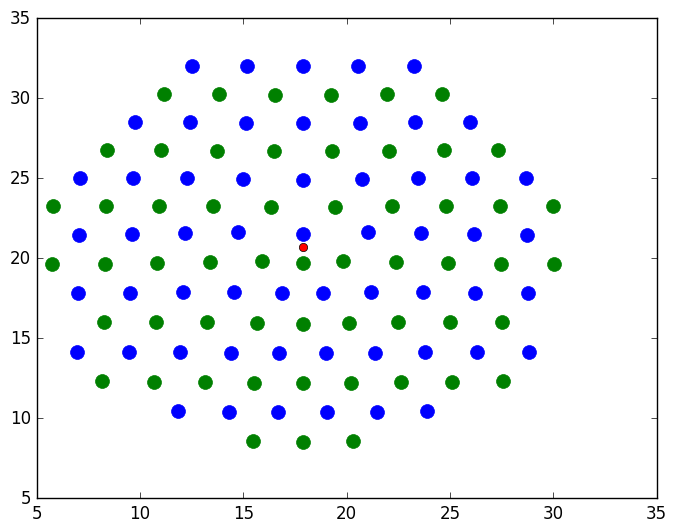

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3346cdf50>

In [10]:
at, xcore = MaterialsScienceTools.Dislocations.fcc_edge_geom("Cu", 5.1)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=20)
plot(x[I1], y[I1], "g.", markersize=20)
plot([xcore[1]], [xcore[2]], "ro")